In [1]:
#Shivshankar Mulage
#https://techingknowledge.blogspot.com/2022/12/MovieRatingsAnalysisPythonProject.html
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
movies = pd.read_csv("/content/Movie-Ratings.csv")

In [3]:
#Display Top 5 Rows of The Dataset
movies.head()

,Film,Genre,Rotten_Tomatoes_Ratings,Audience_Ratings,Budget_M,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [4]:
#Display Bottom 5 Rows of The Dataset
movies.tail()

,Film,Genre,Rotten_Tomatoes_Ratings,Audience_Ratings,Budget_M,Year
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009
558,Zookeeper,Comedy,14,42,80,2011


In [5]:
#lets prints the information about the DataFrame
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Film                     559 non-null    object
 1   Genre                    559 non-null    object
 2   Rotten_Tomatoes_Ratings  559 non-null    int64 
 3   Audience_Ratings         559 non-null    int64 
 4   Budget_M                 559 non-null    int64 
 5   Year                     559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


***We have loaded the movies dataset. We can see that "year" is treated as an integer type. The year should not be treated as an integer.***

In [6]:
#lets print the description of the data
movies.describe()

,Rotten_Tomatoes_Ratings,Audience_Ratings,Budget_M,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


***It is ok to have summarised the dataframe, but the percentiles do not make any sense for the year. We would not like to see statistics performed on a year, like mean, median, etc.
For this, we should change the data type from an integer to a category. At the same time, let's change the column name as per our needs.***

In [7]:
#Chnging the datatype of year column as category
movies.Year = movies.Year.astype('category')
#changing column name
movies.rename(columns = {"Audience_Ratings":"AudienceRating", "Rotten_Tomatoes_Ratings": "CriticRating", "Budget_M":"Budget"}, inplace=True)

In [8]:
#Let's check again
movies.info()
movies.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    object  
 1   Genre           559 non-null    object  
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   Budget          559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(1), int64(3), object(2)
memory usage: 22.7+ KB


,CriticRating,AudienceRating,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [9]:
#Lets check Years
movies.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

# JointPlot

***A jointplot is a plot of two variables with bivariate and univariate graphs. Let's generate the joint plot for CriticRating and AudienceRating.***

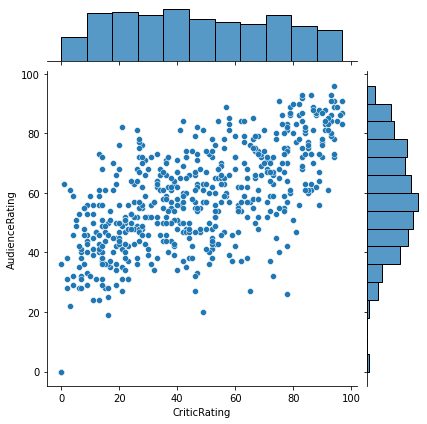

In [10]:
#Joint Plot using seaborn
sns.jointplot(data=movies, x='CriticRating', y='AudienceRating')

***As seen, we generated a jointplot with functions for CriticRating and AudienceRating. The forefront plot is a scatterplot, while the other plot is a bar plot.
From the above jointplot we can see that CriticRatings are almost evenly distributed over the range, but in the case of AudienceRating there are very few or no ratings below 20.***

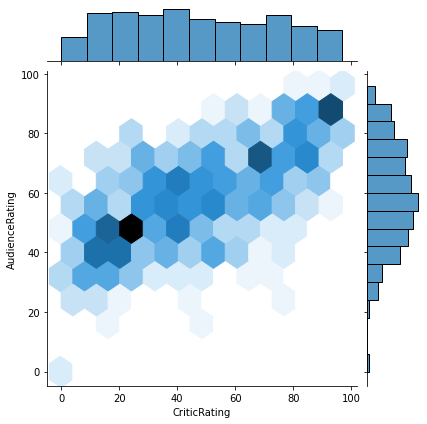

In [11]:
#jointplot with hex poattern
sns.jointplot(data=movies, x='CriticRating', y='AudienceRating', kind='hex')

# HISTOGRAM

***Let's analyse the dataset using a histogram. The visualisations are more mature in Seaborn than Pyplot. In addition, the line that runs across the plot in Seaborn is an indicator.***

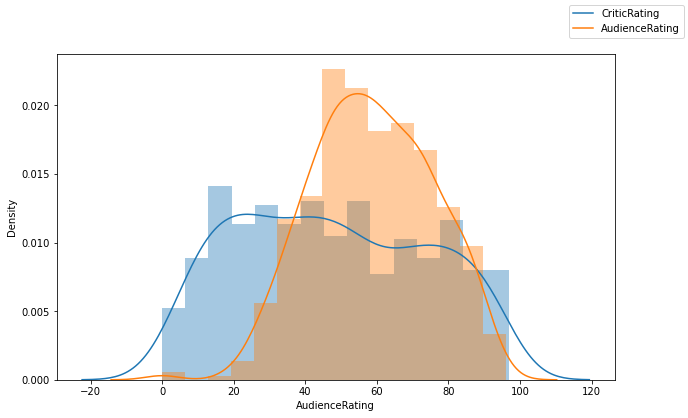

In [12]:
#histogram plot using seaborn
fig = plt.figure(figsize=(10,6))
sns.distplot(movies.CriticRating, bins=15, label = 'CriticRating')
sns.distplot(movies.AudienceRating, bins=15, label = 'AudienceRating')
fig.legend(labels=['CriticRating','AudienceRating'])
plt.show()

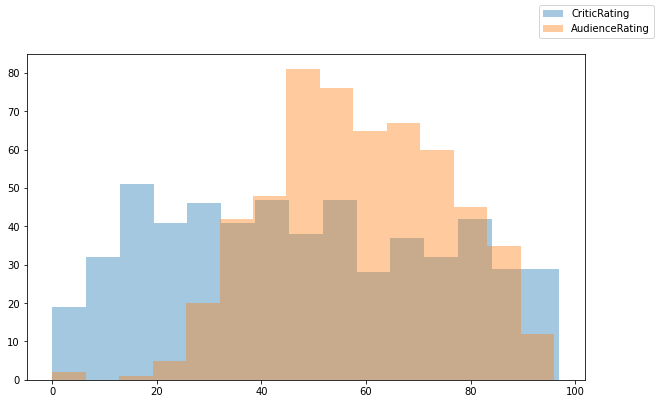

In [13]:
#histogram using pyplot
fig = plt.figure(figsize=(10,6))
plt.hist(movies.CriticRating, bins=15, alpha=0.4)
plt.hist(movies.AudienceRating, bins=15, alpha=0.4)
fig.legend(labels=['CriticRating','AudienceRating'])
plt.show()

***We can see from the histograms of AudienceRating and CriticRating that AudienceRating has a normal distribution while CriticRating has uniformity.*** 

***Staked Histogram.* We can plot movies based on budget, and the histogram appears as seen.**

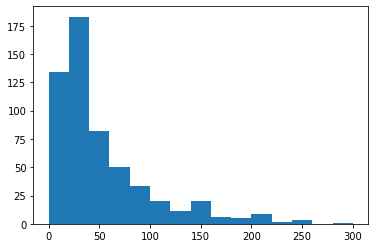

In [14]:
#Staked Histogram
plt.hist(movies.Budget, bins=15)
plt.show()

If we want to plot based on Genre, then we can specify a Genre.

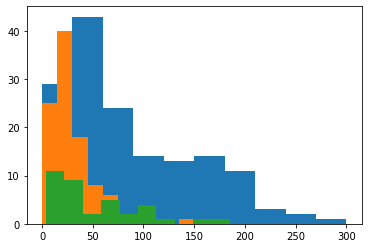

In [15]:
#Staked Histogram for different Genre
plt.hist(movies[movies.Genre=='Action'].Budget)
plt.hist(movies[movies.Genre=='Drama'].Budget)
plt.hist(movies[movies.Genre=='Thriller'].Budget)
plt.show()

***These are not stacked yet, but if we want a stacked histogram, we must pull all the criteria into a single line and mention it. stacked = True***

(array([[ 9., 39., 24., 13., 16.,  9.,  8., 14.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [48., 80., 35., 19., 18., 10.,  8., 15.,  5.,  4.,  8.,  2.,  2.,
          0.,  1.],
        [52., 94., 39., 24., 20., 14.,  9., 16.,  5.,  5.,  8.,  2.,  2.,
          0.,  1.]]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
        220., 240., 260., 280., 300.]),
 <a list of 3 Lists of Patches objects>)

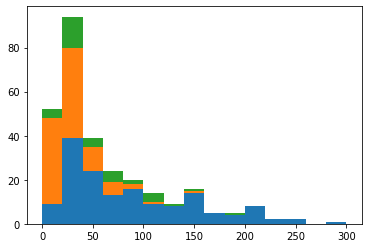

In [16]:
#Staked Histogram 
plt.hist([movies[movies.Genre=='Action'].Budget, movies[movies.Genre=='Drama'].Budget,movies[movies.Genre=='Thriller'].Budget], bins=15, stacked = True)

***We can convert genres into categories and use them to simplify our programming.***

In [17]:
#changing the datatype 
movies.Genre = movies.Genre.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    object  
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   Budget          559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(2), int64(3), object(1)
memory usage: 19.2+ KB


In [18]:
#Lets check the Genres
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

***Let's analyse the genre using a stacked histogram. We created an array list, assigned the category variable "Genre" to "gen," and used it within the loop.We used an append function in the list so that all the lists are added up. We created a histogram using the defined list. We used rwidth = 1, which means that there is no gap between the bars and 100% space is used.
And for legend we created empty list as mylables. used this list and appended genres. used mylabel in the histogram function and used plt.legend to show the legend. Thus, our staked histogram is now complete.***

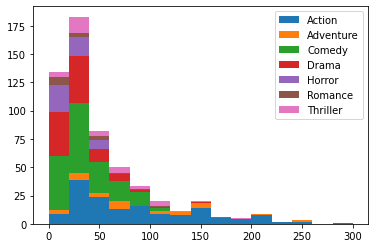

In [19]:
#Staked Histogram using our own function
list1 = list()
mylabels=list()
for gen in movies.Genre.cat.categories:
  list1.append(movies[movies.Genre == gen].Budget)
  mylabels.append(gen)

plt.hist(list1, bins=15, stacked = True, label=mylabels)
plt.legend()
plt.show()

**As we can see, the genre in blue, i.e. action, has the highest budget, followed by adventure. **

# **VIOLIN PLOT VS BOX PLOT**

***A violin plot is a method of plotting numeric data. It is similar to a box plot with a rotated kernel density plot on each side. The violin plot is similar to box plots, except that they also show the probability density of the data at different values. Seaborn can be used to plot both.
In a box plot, the width is uniform, while in a violin plot, the width varies based on distribution. The width tells us the number of points falling in the region. This can't be seen in a box plot but can be known from a violin plot. Also, box plot distribute data into quartiles, so the bottom line till the box is the first quartile, the base of the box to the median line is the second quartile, the median line till the higher end of the box is the third quartile, and the end of the box till the last line of the plot is the fourth quartile. Each quartile has the same number of observations. Violin plots can show concentrations of points better than box plots.***

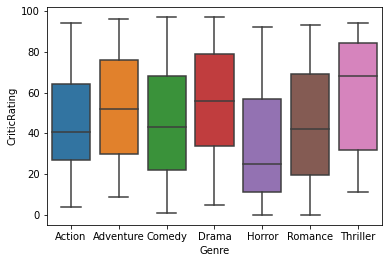

In [20]:
#boxplot for CriticRating
sns.boxplot(data = movies, x = 'Genre', y = 'CriticRating')

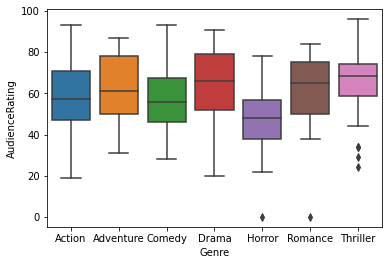

In [21]:
#boxplot for AudienceRating
sns.boxplot(data = movies, x = 'Genre', y = 'AudienceRating')

***According to the first box plot, horror films received less CriticRating, whereas thriller films received high CriticRating.
In the second box plot, we can see that there are some outliers present for some genres. Horror films received a lower AudienceRating, whereas thriller films received a higher AudienceRating.***

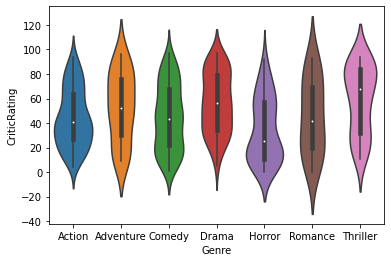

In [22]:
#violinplot for CriticRating
sns.violinplot(data = movies, x = 'Genre', y = 'CriticRating')

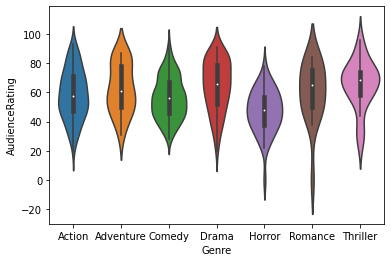

In [23]:
#violinplot for AudienceRating
sns.violinplot(data = movies, x = 'Genre', y = 'AudienceRating')

# **Facet Grid**

***Facet Grid gives a series of plots in the grid. This is different from subplots, as we get a similar kind of plot all across the grid. We use the function sns.FacetGrid. Then use the map function and specify the plot type and the parameters.***

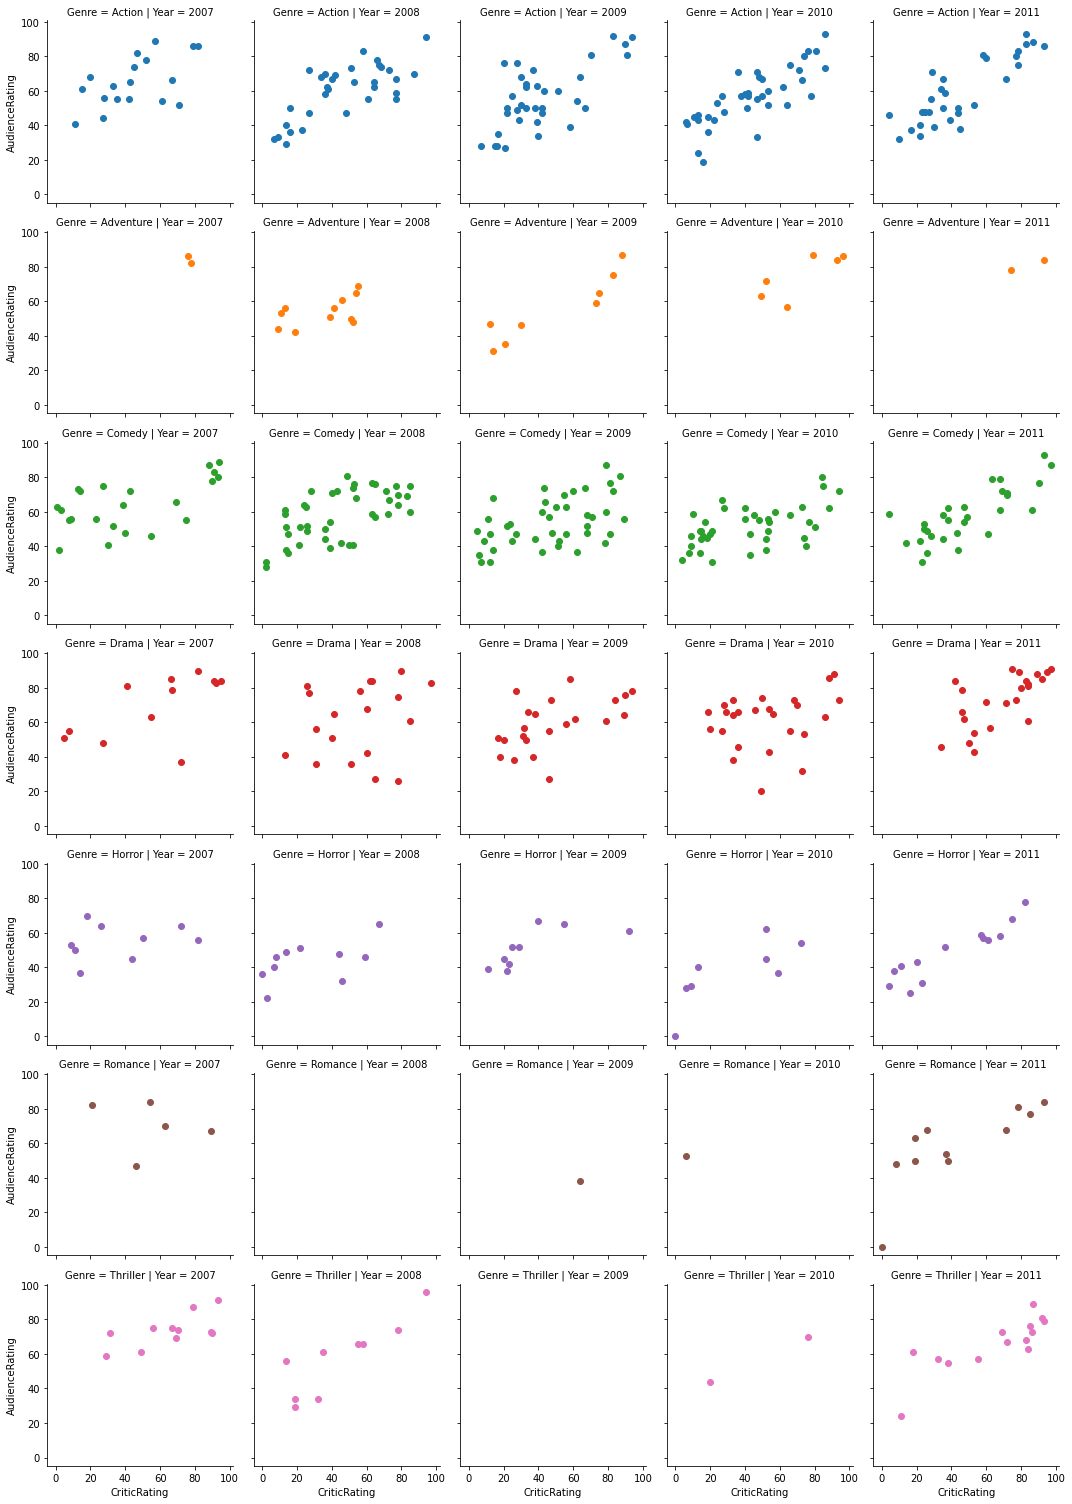

In [24]:
#Facet Grid 
c = sns.FacetGrid(movies, row= 'Genre', col = 'Year', hue = 'Genre')
c = c.map(plt.scatter, 'CriticRating', 'AudienceRating')

***As we can see, the facets grid generated a series of charts with columns separated by year and rows separated by different genres. AudienceRating represents the Y axis, while CriticRating represents the Z axis, respectively, for each chart in the series. And each genre is differentiated by a different color.***

***Most of the movies belong to the action, comedy, and drama genres, which shows that audiences are more interested in this type of movie. Movies with very high audience and critic ratings are considered to be highly liked. That happens mostly for action, drama, and thrillers.
By analysing this dataset, domain experts can make their decisions for upcoming movies that are popular among the audience as per their ratings.
So, if a producer or director wants to make a film, the above-mentioned genre will be most preferred in order to get the best response from the audience and earn the most profit from that film.***